## MIR: using different interpolations

#### Regridding

In [1]:
from earthkit.regrid import regrid
import earthkit.data as ekd

# Get octahedral reduced Gaussian GRIB data containing two fields.
ds = ekd.from_source("sample", "O32_t2.grib2")

# the target grid is a global 1x1 degree regular latitude-longitude grid
grid = {"grid": [1,1]}

# Regrid the fieldlist using various interpolations and
# gather results in a dict
res = {}
for i_type in ["linear", "nearest-neighbour", "grid-box-average"]:
    res[i_type] = regrid(ds, grid=grid, interpolation=i_type)

O32_t2.grib2:   0%|          | 0.00/31.4k [00:00<?, ?B/s]

#### Plotting the results

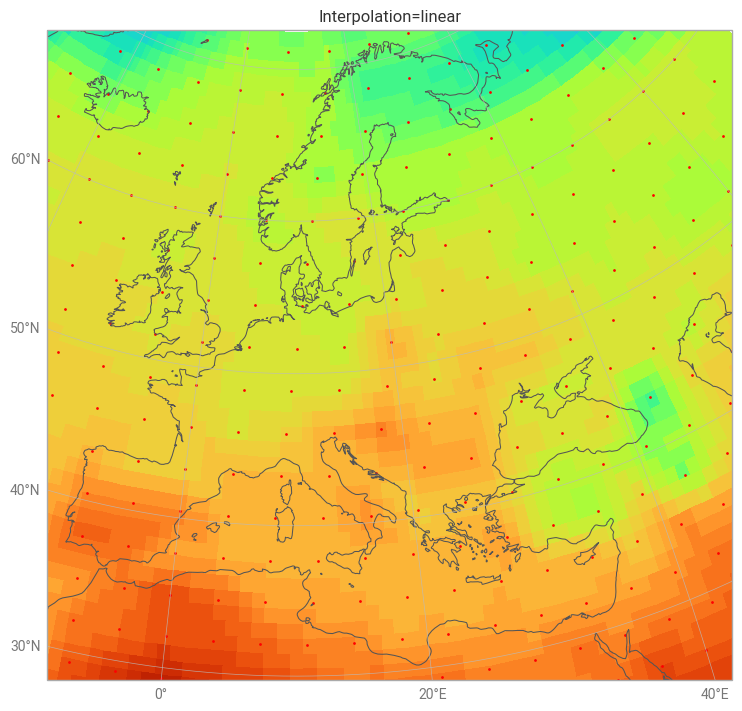

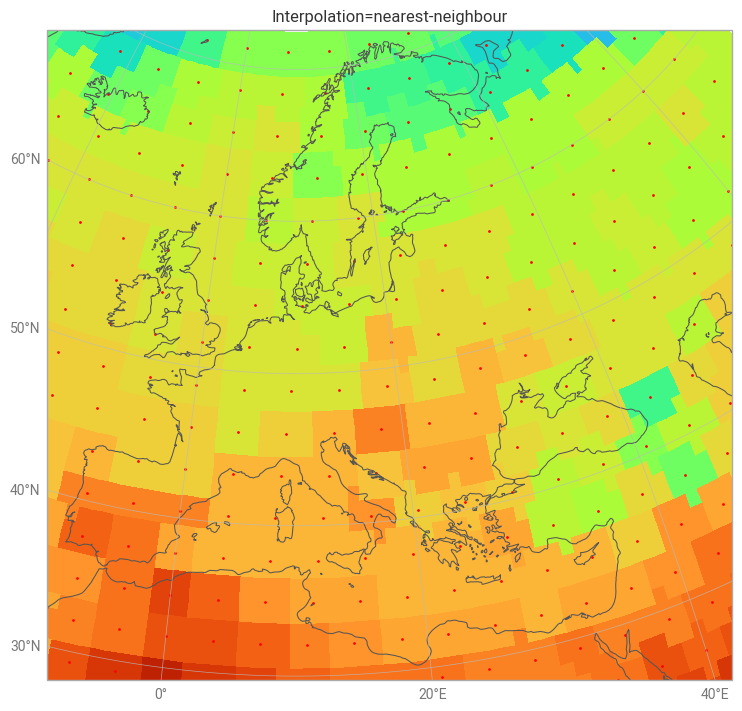

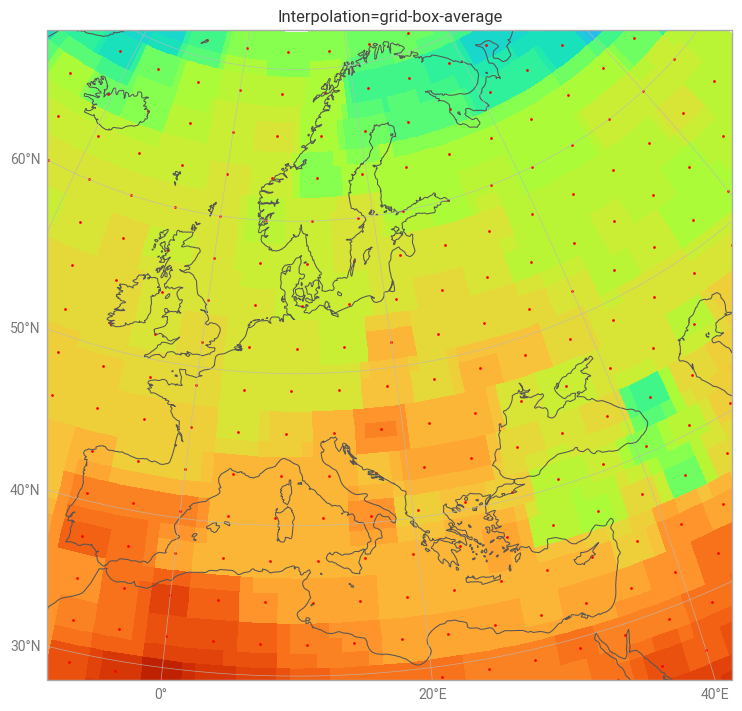

In [2]:
import earthkit.plots as ekp

for i_type, ds_res in res.items():
    chart = ekp.Map(domain=["Europe"])
    # we only plot the first field from the result
    chart.grid_cells(ds_res[0], units="celsius", auto_style=True)
    # plot the original grid points
    chart.grid_points(ds[0])
    chart.title(f"interpolation={i_type}")
    chart.coastlines()
    chart.gridlines()
    chart.show()